# General Imports

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 100

# Importando e entendendo os dados

Nesse ponto, o foco é entender cada coluna e seus valores "únicos" que podem ser assumidos, além disso se há valores nulos, não esperados e a proporção da classe "Churn".

In [3]:
customer_churn = pd.read_csv("../data/Customer-Churn - Customer-Churn.csv")
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,"18,7","1005,7",No
7039,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,"18,7","383,65",No
7040,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),"18,55",689,No
7041,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),"18,4","1057,85",No


In [4]:
# Verificando a existência de valores nulos e os data types.
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [5]:
# Changing the types of tenure, monthly and total charges.
customer_churn["MonthlyCharges"] = customer_churn["MonthlyCharges"].str.replace(",",".").astype("float32")
customer_churn["TotalCharges"] = customer_churn["TotalCharges"].str.replace(",",".").astype("float32")
customer_churn["tenure"] = customer_churn["tenure"].astype("int16")

In [6]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.750000,8672.450195,No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.650002,8477.599609,No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.599998,7990.049805,No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.599998,7365.700195,No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.349998,7804.149902,Yes


In [7]:
# Agora os objetos estão num tipo apropriado.
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int16  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Vamos investigar os valores nulos da coluna TotalCharges
customer_churn[customer_churn["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2531,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
3343,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.349998,NaN,No
4023,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900002,NaN,No
4315,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
4583,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
5484,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,NaN,No
5549,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,NaN,No
6213,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,NaN,No
6429,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,NaN,No
6562,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,NaN,No


In [9]:
customer_churn["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [10]:
customer_churn[["tenure", "MonthlyCharges", "TotalCharges"]].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761688,2283.300537
std,24.559481,30.090048,2266.771484
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,401.450012
50%,29.000000,70.349998,1397.475098
75%,55.000000,89.849998,3794.737549
max,72.000000,118.750000,8684.799805


In [12]:
# Dado que eu não possuo conhecimento de negócios de como é extraído esses dados e nada em específico me saltou aos olhos
# para poder inferir o que esteja causando esses valores nulos, 
# vou descartar esses dados pois representam baixíssimo volume da base toda.
indexes_to_drop = customer_churn[customer_churn["TotalCharges"].isna()].index
customer_churn.drop(indexes_to_drop, inplace=True)
customer_churn.reset_index(drop=True, inplace=True)

In [13]:
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.750000,8672.450195,No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.650002,8477.599609,No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.599998,7990.049805,No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.599998,7365.700195,No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.349998,7804.149902,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.700001,1005.700012,No
7028,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.700001,383.649994,No
7029,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.549999,689.000000,No
7030,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.400000,1057.849976,No


# Visualizações Básicas

Agora vou plottar alguns gráficos para entendermos melhor o público que foi retirado os dados, suas principais distribuições e frequências.

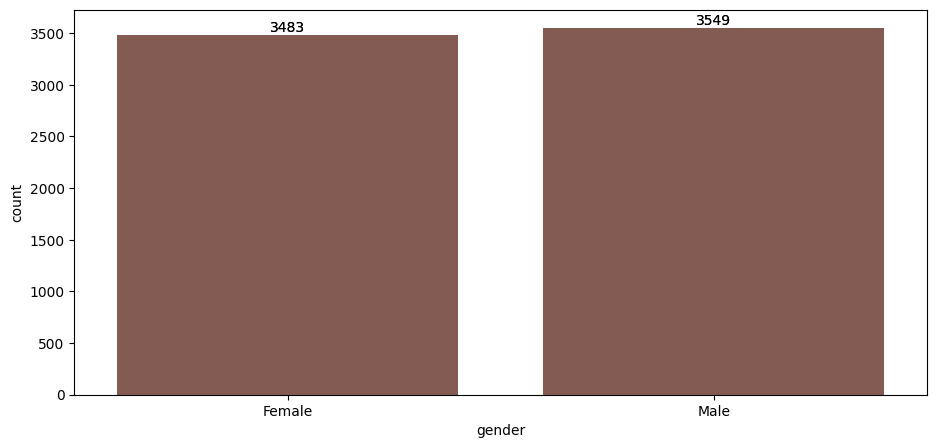

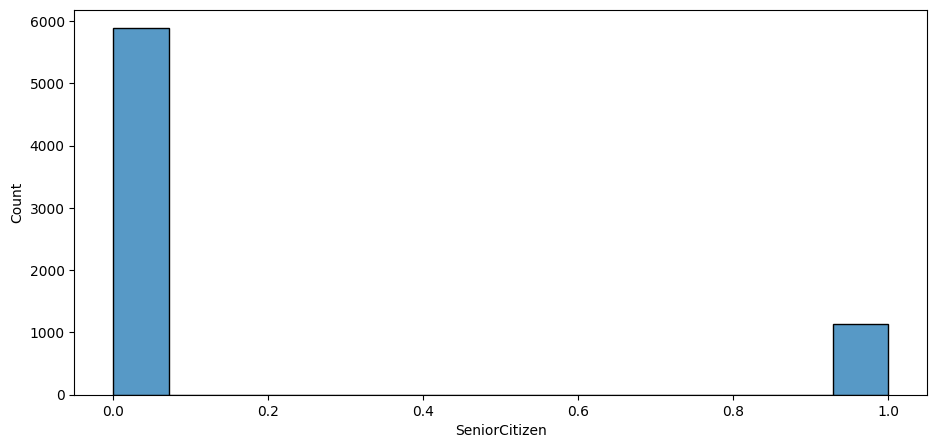

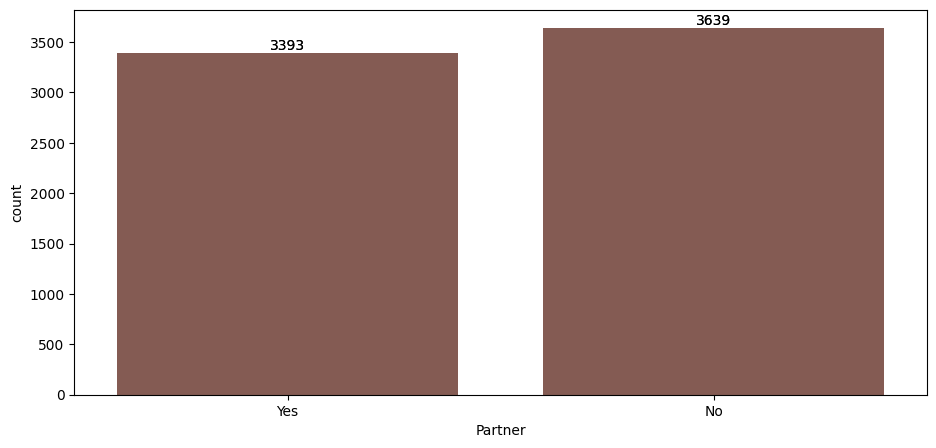

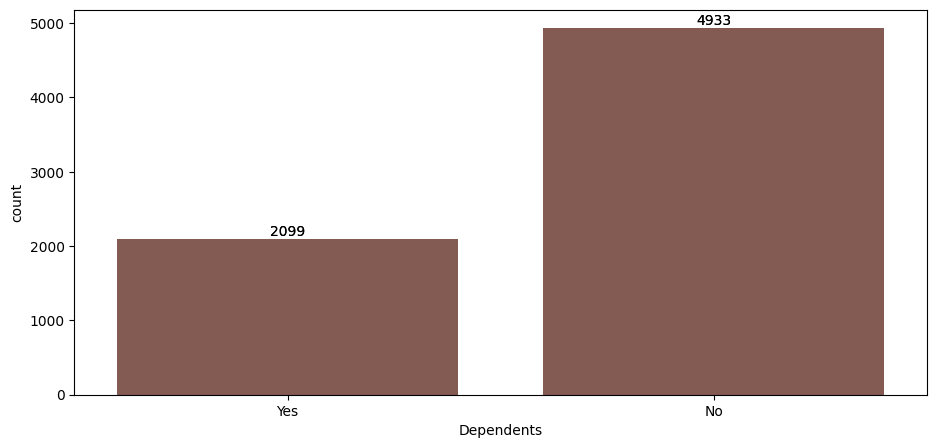

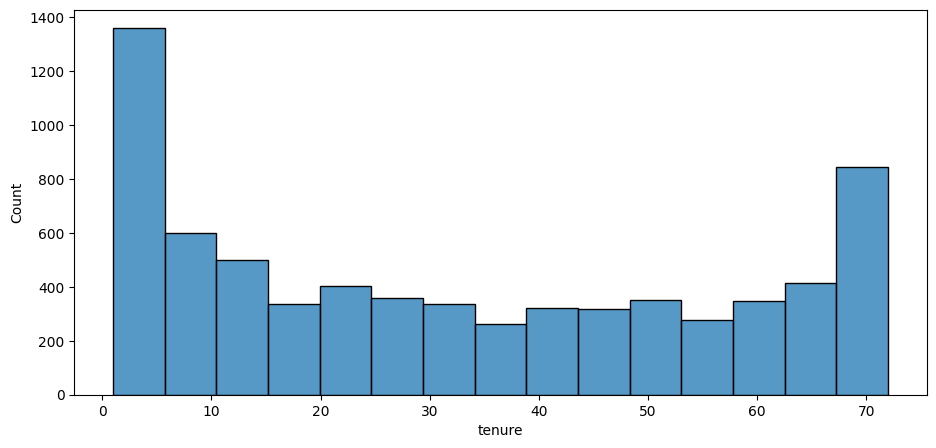

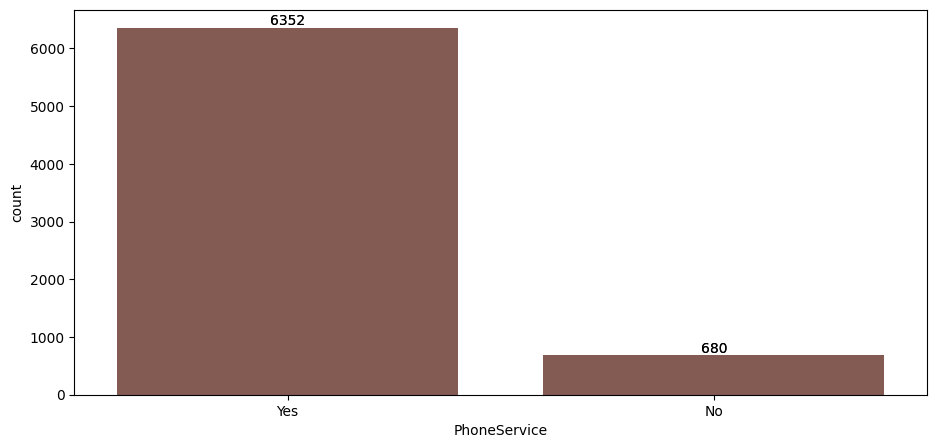

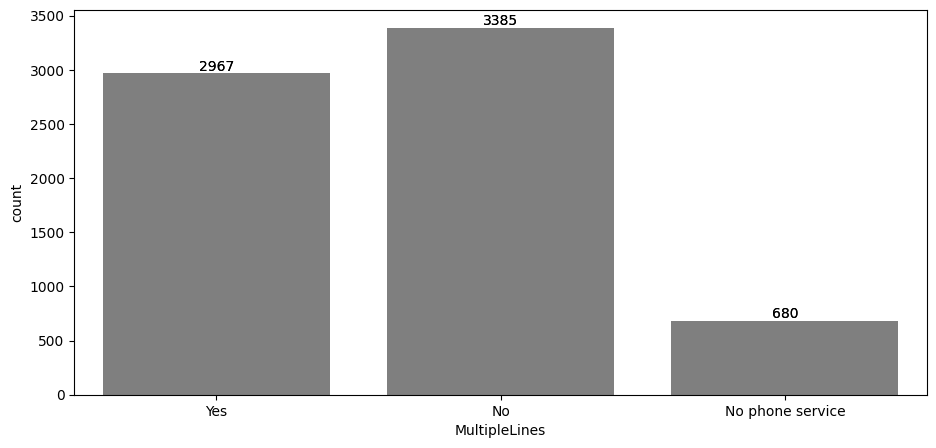

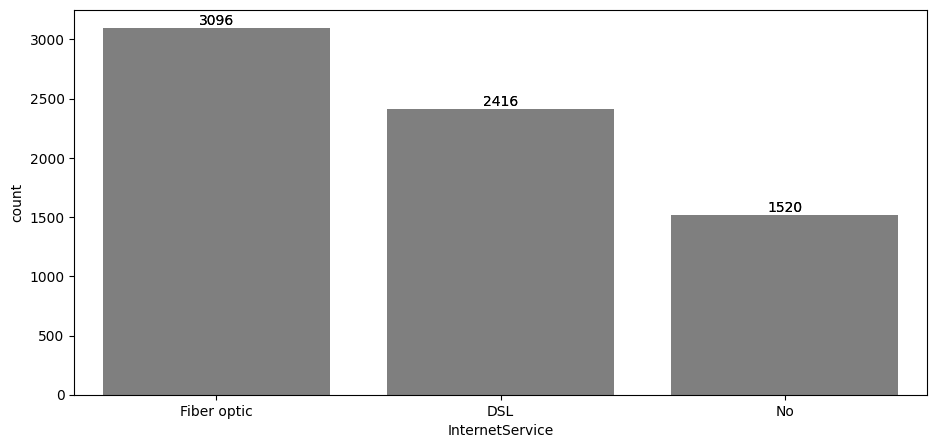

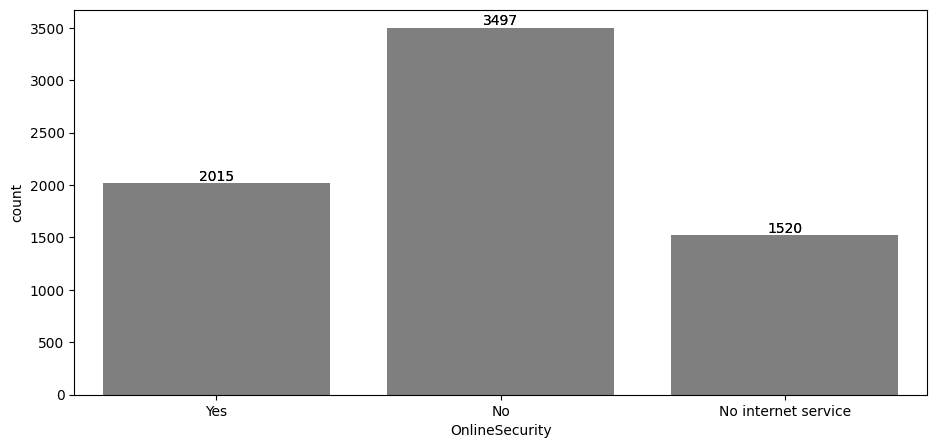

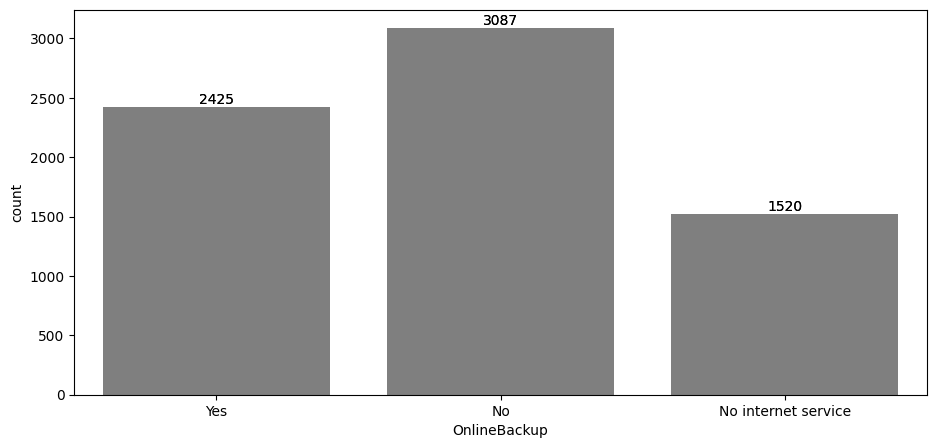

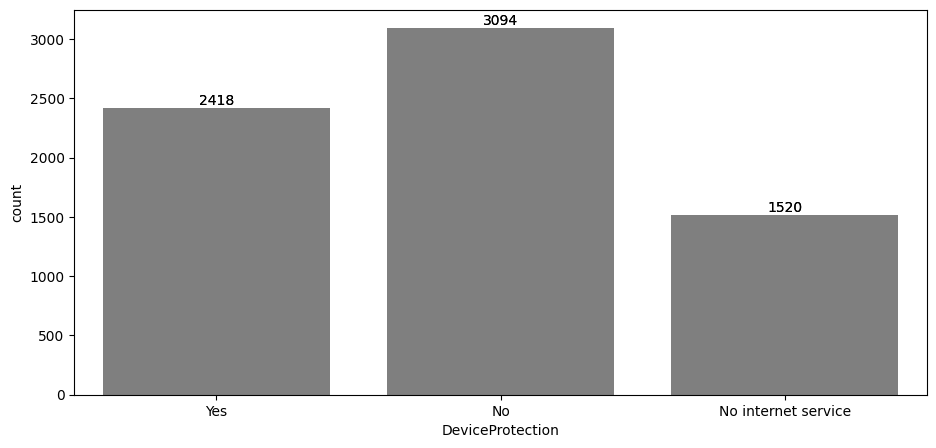

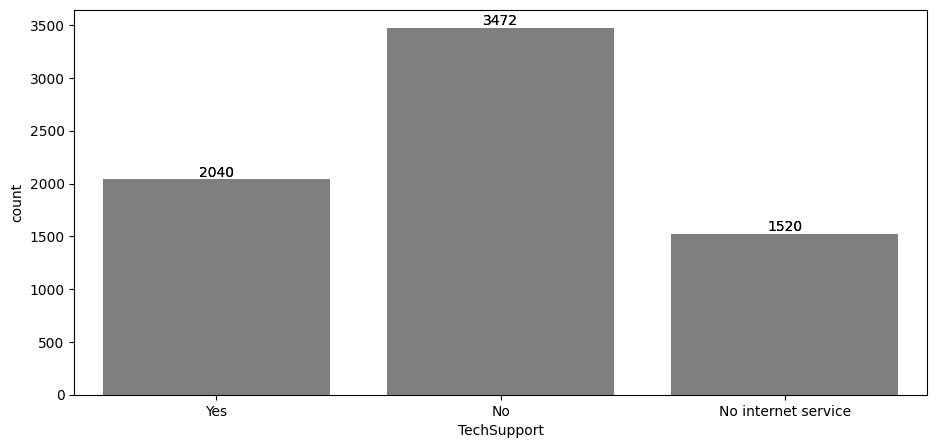

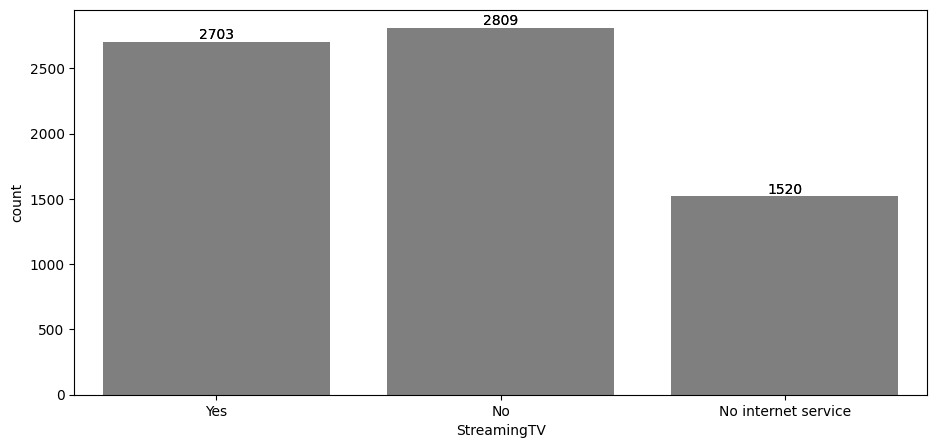

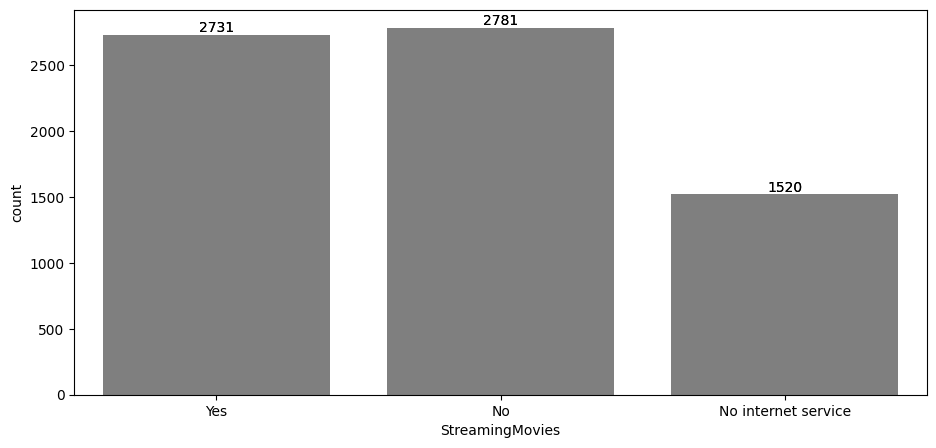

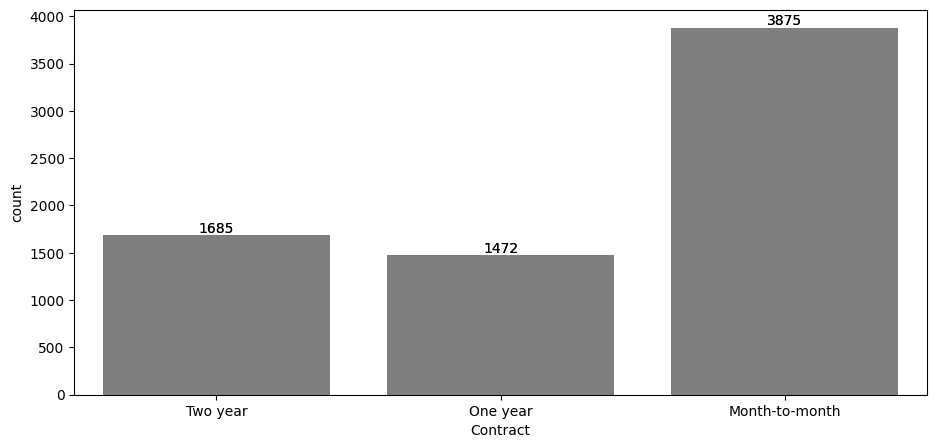

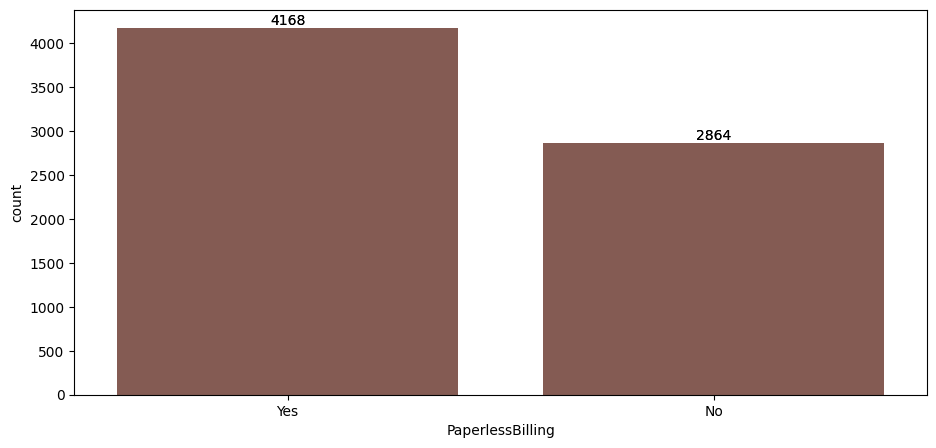

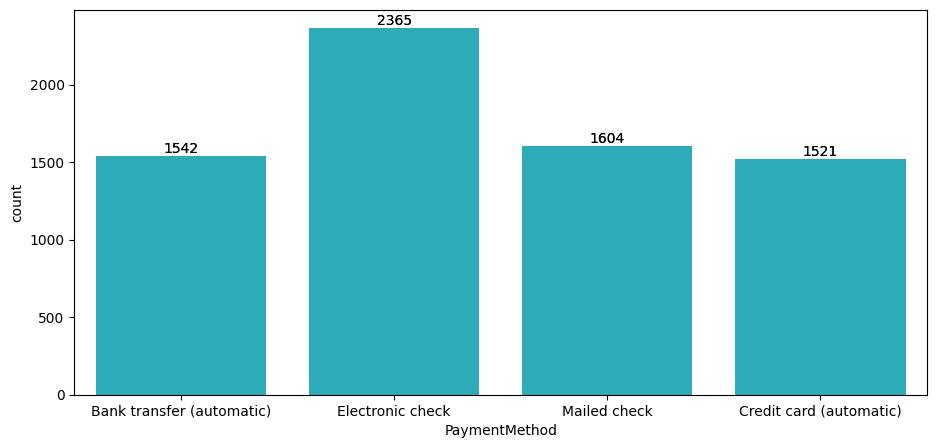

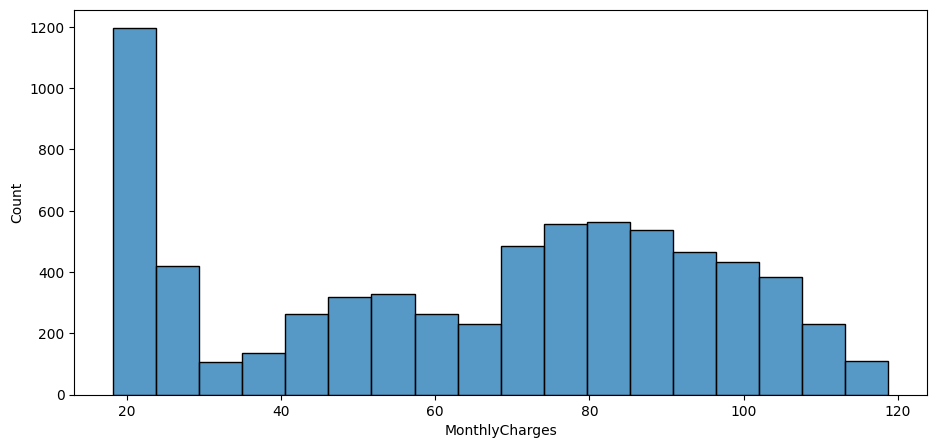

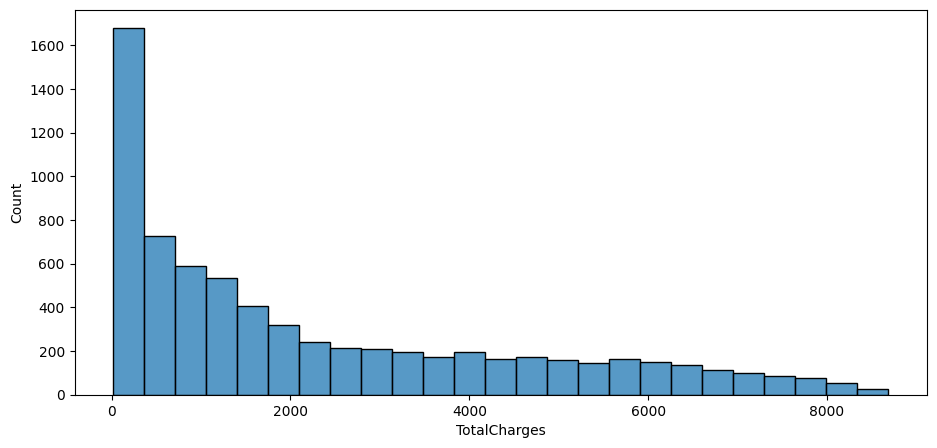

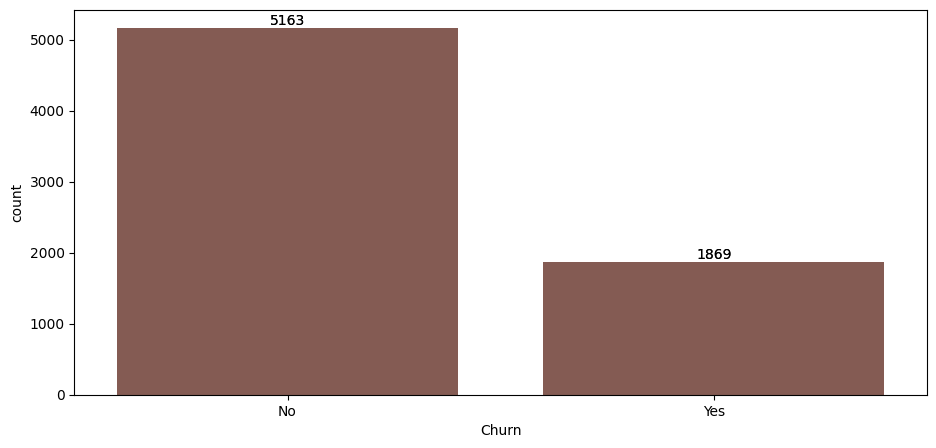

In [102]:
for i in customer_churn.drop("customerID", axis=1).columns:
    column_dtype = str(customer_churn[i].dtype)
    plt.figure(figsize=(11,5))
    plt.tight_layout()
    if "float" in column_dtype or "int" in column_dtype:
        sns.histplot(customer_churn, x=i)
        
    else:
        sns.countplot(customer_churn, x=i)
        for p in sns.countplot(customer_churn, x=i).patches:
            sns.countplot(customer_churn, x=i).annotate(f"{int(p.get_height())}", 
                                                        (p.get_x() + p.get_width() / 2., 
                                                         p.get_height()), ha='center', va = "bottom")
    plt.margins()
    plt.show()

Aqui a gente consegue observar brevemente o comportamento padrão de cada variável no nosso dataframe. Percebemos, claro, o problema de desbalanceamento de classes para Churn -se viéssemos a pensar em modelagem com essa sendo a variável alvo-.

# Confrotando cada variável com Churn

In [33]:
# Para as variáveis categóricas, eu gostaria de garantir que os gráficos estivessem em porcentagem, pra isso vamos criar uma função.

In [103]:
def plot_churn_graph(df, column):
    column_dtype = str(df[column].dtype)

    if "float" in column_dtype or "int" in column_dtype:
        
        sns.kdeplot(df, x=column, common_norm = False, hue = "Churn")
        plt.show()
    else:
        
        grouped = df.groupby(column)["Churn"].value_counts(normalize=True).unstack()
        ax = grouped.plot(kind="bar")
        
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.2f}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom')

        if column == "PaymentMethod":
            plt.xticks(rotation = -45)
        else:
            plt.xticks(rotation=0)
        
        plt.show()

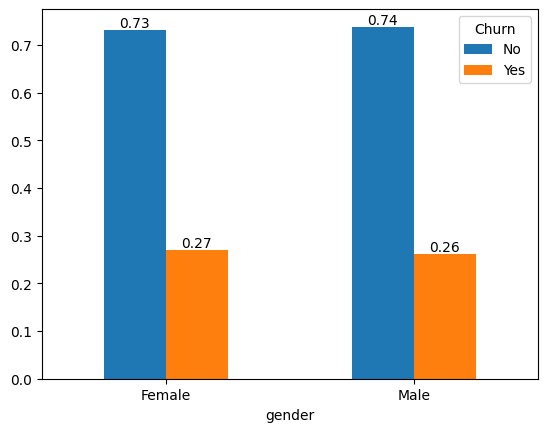

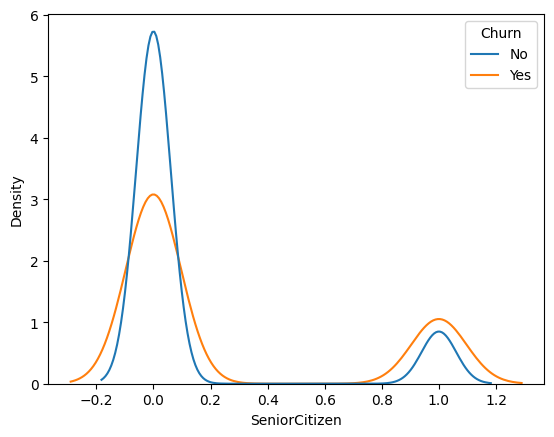

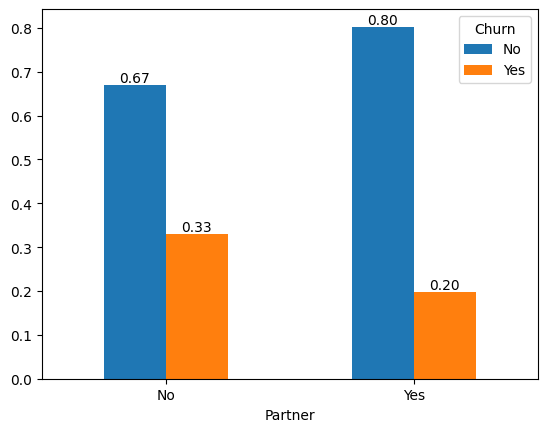

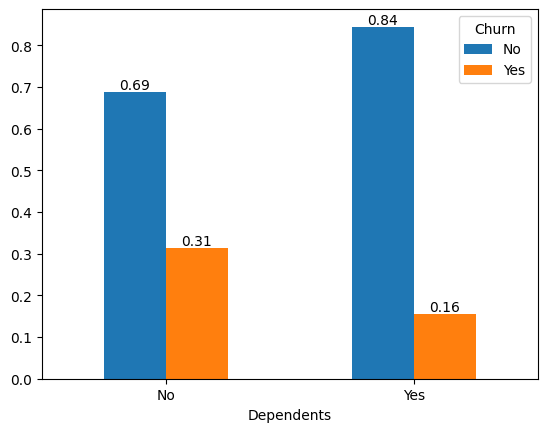

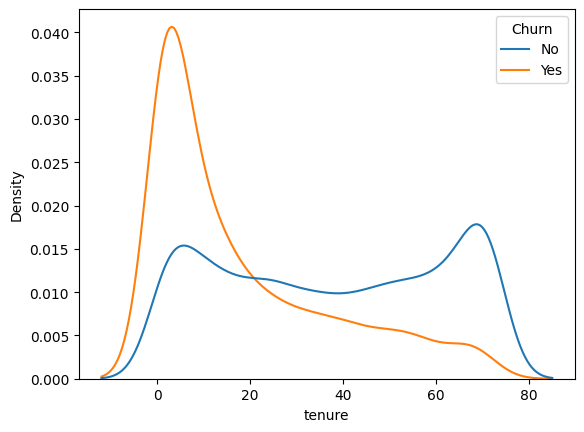

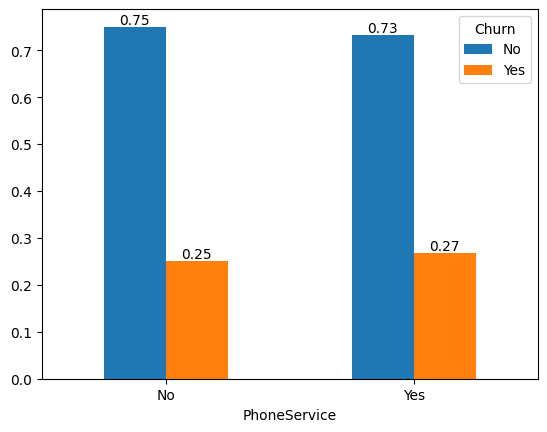

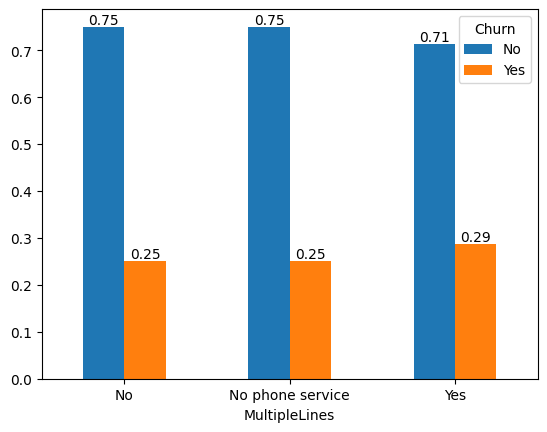

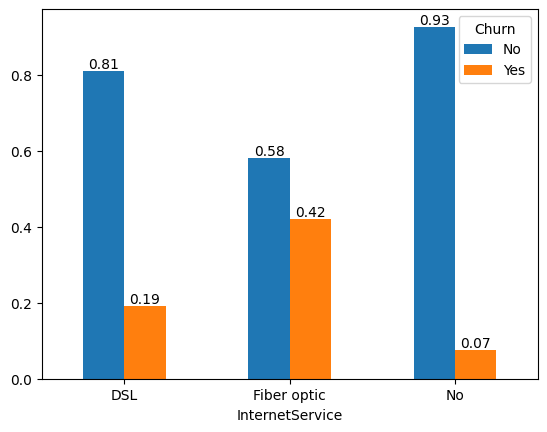

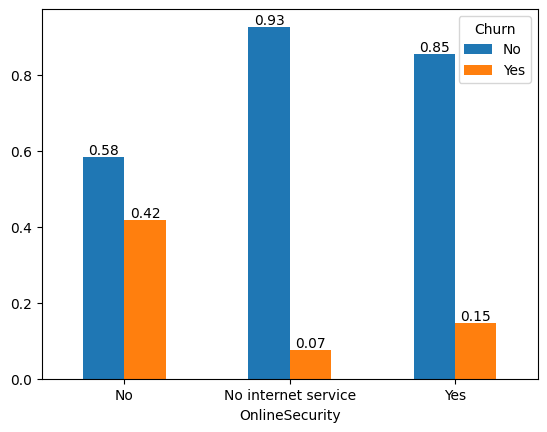

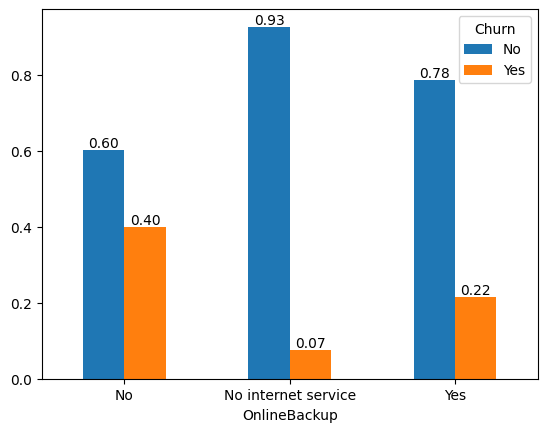

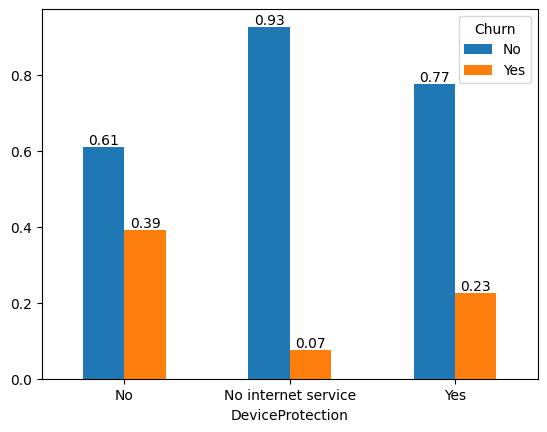

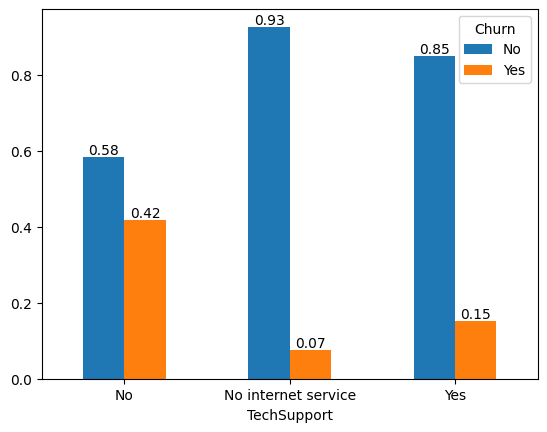

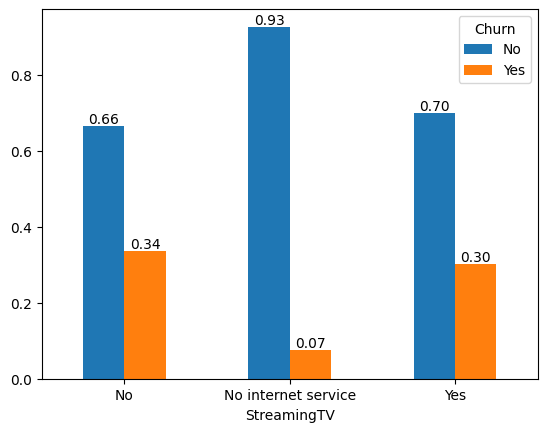

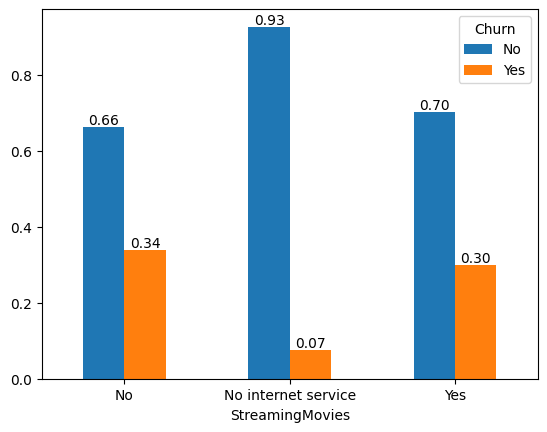

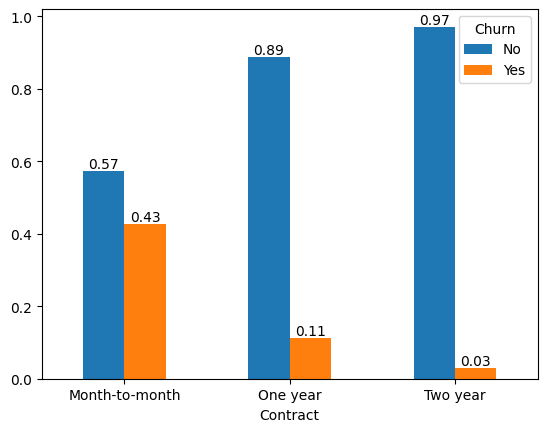

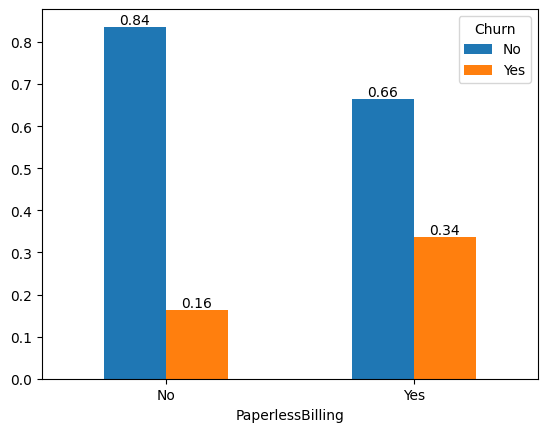

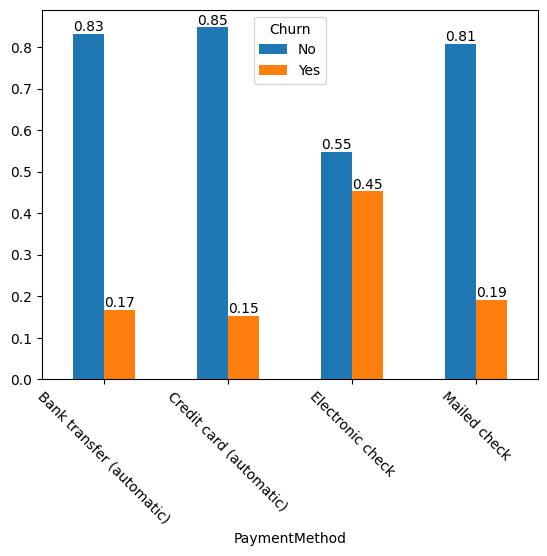

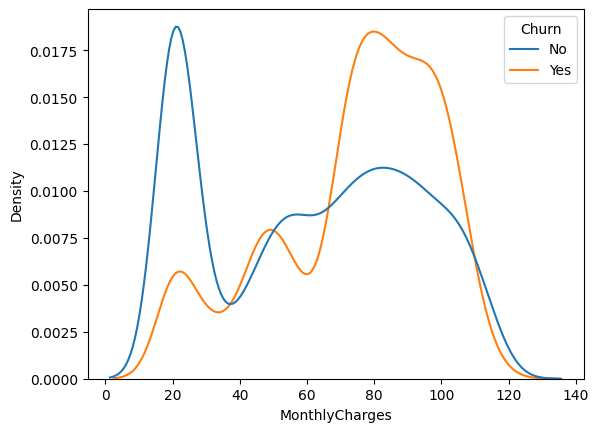

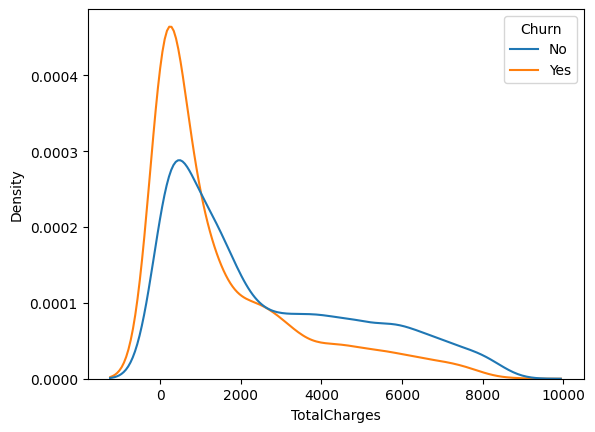

In [104]:
for i in customer_churn.drop("customerID", axis=1).columns:
    if i != "Churn":
        plot_churn_graph(customer_churn, i)

Repara-se algumas discrepâncias e maiores tendências de churn em certas categorias, como por exemplo: cheque eletrônico para métodos de pagamento; pagadores de mensalidade; não beneficiários de serviços de streaming ou ausência de assistência técnica etc. Todas essas variáveis são dignas de serem apresentadas à área de negócios para buscar possíveis estratégias de redução de churn ou entendimento da satisfação dos clientes com os serviços ofertados. Por exemplo, observa-se uma maior taxa de churn em clientes com fibra ótica do que DSL, isso poderia ser indicador de uma maior insatisfação dos clientes com fibra ótica, talvez instabilidade, lentidão, demora de instalação?

Outro detalhe, é que observa-se uma maior taxa de churn em pessoas sem dependentes ou parceiros, isso poderia indicar a tendência de continuação do serviço para pessoas que não moram "sozinhas".

Todas essas hipóteses e observações superficiais podem e devem ser elaboradas a fim de entender as causas raizes do churn.

# Salvando dados

Vamos salvar o dataframe que foi sucintamente modificado para que possamos utilizar no próximo notebook, cujo intuito será a utilização do algoritmo de árvores de decisão para ver se conseguimos encontrar algum destaque maior na tendência de um cliente churnear ou não o serviço. 

In [105]:
customer_churn.to_csv("../data/processed/customer_churn.csv", index=False)